# This code simulates the swing equation for a manufacturer supplier network example

Make sure to have dynamical_networks install using pip (pip install dynamical_networks)

In [1]:
from dynamical_networks.simulate.MS_network import MS_simulation, MS_network
import numpy as np
import matplotlib.pyplot as plt

## Set system parameters

In [14]:
M = np.zeros((4,))+0.1                    #current throughput of manufacturer
S = np.zeros((3,))+0.1                     #current throughput of supplier 
m = len(M)
s = len(S)
a = np.ones(s*m)
edge_density = 0.9
a[:int((m*s)*(1-edge_density))] = 0
np.random.shuffle(a)
A_MS = a.reshape((m,s))        #adjacency matrix for M/S connections

for i in range(len(A_MS)):
    if np.sum(A_MS[i]) == 0:
        j = int(np.random.uniform(0,len(A_MS[i]),1))
        A_MS[i][j] = 1
for i in range(len(A_MS.T)):
    if np.sum(A_MS.T[i]) == 0:
        j = int(np.random.uniform(0,len(A_MS.T[i]),1))
        A_MS[j][i] = 1
print(A_MS)

K_M = np.zeros((m,))+0.1      #maximum throughput of manufacturer
K_M[0] = 0.13
K_S = np.zeros((s,))+0.1       #maximum throughput of supplier (with optimal K_M)
alpha_M = 0.01                     #internal perturbation of manufacturer
alpha_S = 0.01                      #internal perturbation of supplier
B_M1 = np.zeros((m,m))+1.0        #effects of price competition on manufacturer
B_S1 = np.zeros((s,s))+4.0        #effects of price competition on supplier
B_M2 = np.zeros((m,m))+0.5          #effects of technology competition on manufacturer
B_S2 = np.zeros((s,s))+0.5          #effects of technology competition on supplier
mu_M = np.zeros((m,))               #Manufacturer production outsourcing intensity
mu_S = np.zeros((s,))               #Supplier production outsourcing intensity
h = 2

parameters = [M, K_M, alpha_M, B_M1, B_M2, mu_M,S, K_S, alpha_S, B_S1, B_S2, mu_S, h, A_MS]
fs, L = 200, 30
t = np.linspace(0, L,int(L*fs))

[[1. 1. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


## Run Simulation

{0: array([-0.75   , -0.65625]), 1: array([-0.75   , -0.21875]), 2: array([-0.75   ,  0.21875]), 3: array([-0.75   ,  0.65625]), 4: array([ 1.     , -0.65625]), 5: array([1.00000000e+00, 2.08166817e-17]), 6: array([1.     , 0.65625])}


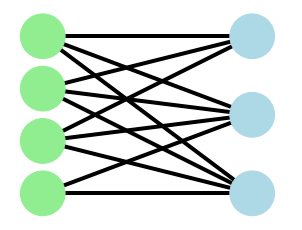

In [21]:
M_arr, S_arr = MS_simulation(t, parameters)
A = MS_network(A_MS, M_arr, S_arr, make_graph_plot = True)

## Show Resulting Throughputs

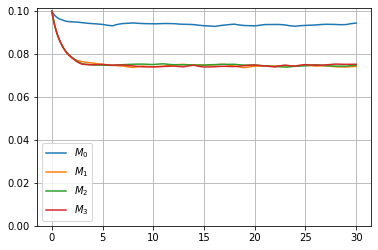

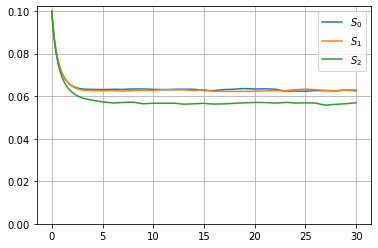

In [22]:
#plot resulting simulation throughput
for i in range(len(M_arr[0])):
    plt.plot(t, M_arr.T[i], label = r'$M_{'+str(i)+'}$')
plt.legend()
plt.ylim(0,)
plt.grid()
plt.show()

for i in range(len(S_arr[0])):
    plt.plot(t, S_arr.T[i], label = r'$S_{'+str(i)+'}$')
plt.legend()
plt.ylim(0,)
plt.grid()
plt.show()